<a href="https://colab.research.google.com/github/Bhavaniprasadgummadala/ML-models/blob/main/stockprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

ticker_symbol = 'MSFT'

stock_data = yf.download(ticker_symbol, start = '2015-01-01', end = '2025-10-26')

print(stock_data.head())

print(stock_data.tail())

close_prices = stock_data['Close'].values.reshape(-1, 1)


/tmp/ipython-input-805992511.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start = '2015-01-01', end = '2025-10-26')
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2015-01-02  39.933056  40.496696  39.745178  39.847657  27913900
2015-01-05  39.565842  39.907440  39.497520  39.599999  39673900
2015-01-06  38.985111  39.924510  38.891171  39.608531  36447900
2015-01-07  39.480434  39.676854  38.848476  39.266934  29114100
2015-01-08  40.641884  40.778524  39.898904  39.924523  29645200
Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2025-10-20  516.789978  518.700012  513.429993  514.609985  14665600
2025-10-21  517.659973  518.690002  513.039978  517.500000  15586200
2025-10-22  520.539978  525.229980  517.710022  521.150024  18962700
2025-10-23  520.559998  523.950012  518.609985  522.460022  140235

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - loss: 0.0309
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - loss: 3.3406e-04
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 1.1208e-04
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - loss: 1.0355e-04
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step - loss: 1.0182e-04
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 9.1845e-05
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - loss: 9.8598e-05
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 246ms/step - loss: 1.0850e-04
Epoch 9/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - loss: 9.6969e-05
Epoch 10/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - loss: 9.1073e-05
Epoch 11/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - loss: 9.0134e-05
Epoch 12/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - loss: 8.7681e-05
Epoch 13/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - loss: 9.7763e-05
Epoch 14/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - loss: 8.9548e-05
Epoch 15/3

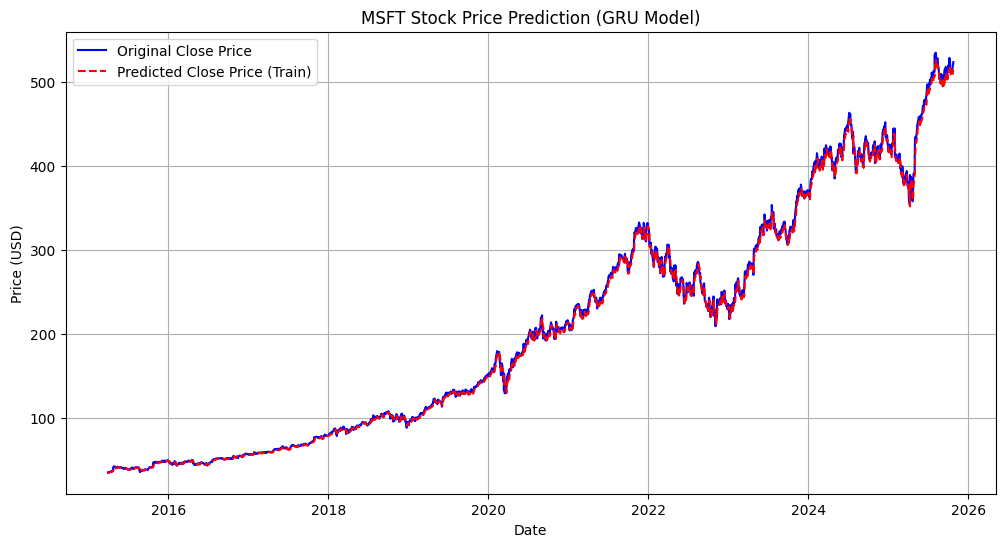

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

time_step = 60

X_train, y_train = [], []
for i in range(time_step, len(scaled_data)):
    X_train.append(scaled_data[i - time_step:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


model = Sequential([
    GRU(100, return_sequences=True, input_shape=(time_step, 1)),
    GRU(100),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)


last_60_days = scaled_data[-time_step:]

X_test = np.reshape(last_60_days, (1, time_step, 1))

predicted_scaled = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

print(f"\n Predicted Closing Price for 27 Oct 2025: ${predicted_price:.2f}")


predicted_all_scaled = model.predict(X_train)
predicted_all = scaler.inverse_transform(predicted_all_scaled)

actual = close_prices[time_step:]
dates = stock_data.index[time_step:]

plt.figure(figsize=(12, 6))
plt.plot(dates, actual, label='Original Close Price', color='blue')
plt.plot(dates, predicted_all, label='Predicted Close Price (Train)', color='red', linestyle='--')
plt.title('MSFT Stock Price Prediction (GRU Model)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

